In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from sqlalchemy import create_engine

# Extract CSVs into DataFrames

In [2]:
# read csv file Africa
africa_csv = "static/Data/africa.csv"

In [3]:
# Create dataframe
africa_df = pd.read_csv(africa_csv)
africa_df.head()

,Date,Samsung,Apple,Huawei,Tecno,Infinix,Xiaomi,Oppo,Unknown,Itel,...,CAT,White Label,Caterpillar,MobiWire,RIM,Honor,Meizu,bq,Coolpad,Other
0,2021-05,30.11,16.23,15.90,8.06,5.23,4.35,5.15,4.96,1.95,...,0.04,0.02,0.03,0.03,0.03,0.01,0.02,0.01,0.01,0.15
1,2021-06,30.92,14.47,16.86,6.73,4.96,4.88,6.49,4.74,1.65,...,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.14
2,2021-07,31.85,15.95,16.21,7.79,4.84,3.88,4.19,5.50,1.85,...,0.04,0.02,0.03,0.03,0.02,0.01,0.01,0.01,0.01,0.15
3,2021-08,32.06,15.68,15.22,8.11,6.18,4.25,4.14,4.47,1.92,...,0.03,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.14
4,2021-09,31.54,14.90,14.68,8.26,6.60,4.69,4.79,4.52,1.96,...,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.13


In [4]:
# Preforming a .count to make sure that the data is complete
print(africa_df.count())

Date           13
Samsung        13
Apple          13
Huawei         13
Tecno          13
Infinix        13
Xiaomi         13
Oppo           13
Unknown        13
Itel           13
Nokia          13
Realme         13
Lenovo         13
Vivo           13
LG             13
Infinex        13
Sony           13
Condor         13
HTC            13
Hisense        13
Motorola       13
Vodafone       13
Gionee         13
Google         13
Safaricom      13
OnePlus        13
ZTE            13
Mobicel        13
Wiko           13
Alcatel        13
BBK            13
Lava           13
Asus           13
Sharp          13
CAT            13
White Label    13
Caterpillar    13
MobiWire       13
RIM            13
Honor          13
Meizu          13
bq             13
Coolpad        13
Other          13
dtype: int64


In [5]:
# read csv file Asia
asia_csv = "static/Data/asia.csv"

In [6]:
# Create dataframe
asia_df = pd.read_csv(asia_csv)
asia_df.head()

,Date,Samsung,Apple,Xiaomi,Oppo,Vivo,Huawei,Realme,Unknown,OnePlus,...,Alcatel,ZTE,Turkcell,Panasonic,Wiko,Mobiistar,Lyf,Coolpad,Yxtel,Other
0,2021-05,25.40,16.14,15.17,9.26,7.78,8.39,4.34,4.36,1.12,...,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.21
1,2021-06,24.55,16.34,15.46,9.55,8.10,8.06,4.63,4.22,1.16,...,0.03,0.03,0.02,0.03,0.02,0.02,0.02,0.02,0.01,0.19
2,2021-07,24.32,16.49,15.74,9.55,8.10,7.78,4.81,4.33,1.12,...,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.17
3,2021-08,24.34,16.05,16.43,9.76,8.74,7.50,5.19,3.01,1.20,...,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.15
4,2021-09,23.99,15.90,16.63,9.89,8.88,7.65,5.28,3.00,1.20,...,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.15


In [7]:
# Preforming a .count to make sure that the data is complete
print(asia_df.count())

Date              13
Samsung           13
Apple             13
Xiaomi            13
Oppo              13
Vivo              13
Huawei            13
Realme            13
Unknown           13
OnePlus           13
Infinix           13
Tecno             13
Asus              13
Motorola          13
Nokia             13
Lenovo            13
Sony              13
LG                13
BBK               13
Itel              13
Google            13
General Mobile    13
HTC               13
Lava              13
Infinex           13
Vestel            13
Casper            13
Micromax          13
Gionee            13
Honor             13
LeEco             13
Sharp             13
Meizu             13
QMobile           13
Reeder            13
Alcatel           13
ZTE               13
Turkcell          13
Panasonic         13
Wiko              13
Mobiistar         13
Lyf               13
Coolpad           13
Yxtel             13
Other             13
dtype: int64


In [8]:
# read csv file Worldwide
worldwide_csv = "static/Data/worldwide.csv"

In [9]:
# Create dataframe
worldwide_df = pd.read_csv(worldwide_csv)
worldwide_df.head()

,Date,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,...,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
0,2021-05,26.46,27.84,10.63,8.84,5.39,4.12,2.41,3.20,2.18,...,0.03,0.03,0.02,0.02,0.01,0.01,0.02,0.0,0.01,0.26
1,2021-06,26.35,27.48,10.80,8.66,5.67,4.32,2.62,3.12,2.23,...,0.02,0.03,0.02,0.02,0.01,0.01,0.01,0.0,0.02,0.25
2,2021-07,26.92,27.33,10.94,8.19,5.54,4.34,2.66,3.21,2.27,...,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.0,0.02,0.23
3,2021-08,26.42,27.92,11.38,7.91,5.61,4.58,2.83,2.27,2.25,...,0.02,0.03,0.02,0.01,0.04,0.01,0.01,0.0,0.01,0.21
4,2021-09,26.75,27.55,11.51,7.88,5.65,4.57,2.85,2.26,2.26,...,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0,0.01,0.20


In [10]:
#Code to view all columns in dataset
pd.set_option('max_columns', None)
worldwide_df.head()

,Date,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,LG,OnePlus,Tecno,Infinix,Google,Nokia,Lenovo,Sony,Asus,Itel,HTC,BBK,ZTE,General Mobile,Alcatel,Infinex,Lava,Vestel,Casper,Micromax,Honor,Gionee,T-Mobile,Meizu,Wiko,LeEco,Vodafone,Coolpad,Sharp,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
0,2021-05,26.46,27.84,10.63,8.84,5.39,4.12,2.41,3.20,2.18,1.58,0.87,0.77,0.62,0.67,0.64,0.60,0.53,0.53,0.21,0.20,0.19,0.14,0.14,0.13,0.10,0.11,0.06,0.06,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.03,0.03,0.02,0.02,0.01,0.01,0.02,0.0,0.01,0.26
1,2021-06,26.35,27.48,10.80,8.66,5.67,4.32,2.62,3.12,2.23,1.55,0.89,0.74,0.63,0.66,0.64,0.57,0.50,0.52,0.20,0.20,0.19,0.14,0.13,0.13,0.11,0.11,0.06,0.05,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.01,0.01,0.01,0.0,0.02,0.25
2,2021-07,26.92,27.33,10.94,8.19,5.54,4.34,2.66,3.21,2.27,1.55,0.88,0.74,0.60,0.67,0.63,0.56,0.48,0.50,0.20,0.19,0.18,0.13,0.12,0.12,0.11,0.10,0.05,0.05,0.07,0.04,0.05,0.04,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.0,0.02,0.23
3,2021-08,26.42,27.92,11.38,7.91,5.61,4.58,2.83,2.27,2.25,1.52,0.96,0.86,0.82,0.68,0.60,0.54,0.46,0.47,0.26,0.17,0.16,0.13,0.11,0.11,0.11,0.09,0.05,0.05,0.05,0.04,0.05,0.04,0.03,0.03,0.01,0.03,0.02,0.02,0.02,0.03,0.02,0.01,0.04,0.01,0.01,0.0,0.01,0.21
4,2021-09,26.75,27.55,11.51,7.88,5.65,4.57,2.85,2.26,2.26,1.45,0.96,0.90,0.88,0.67,0.58,0.53,0.44,0.44,0.27,0.16,0.15,0.13,0.10,0.11,0.11,0.08,0.05,0.04,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0,0.01,0.20


In [11]:
# Preforming a .count to make sure that the data is complete
print(worldwide_df.count())

Date              13
Apple             13
Samsung           13
Xiaomi            13
Huawei            13
Oppo              13
Vivo              13
Realme            13
Unknown           13
Motorola          13
LG                13
OnePlus           13
Tecno             13
Infinix           13
Google            13
Nokia             13
Lenovo            13
Sony              13
Asus              13
Itel              13
HTC               13
BBK               13
ZTE               13
General Mobile    13
Alcatel           13
Infinex           13
Lava              13
Vestel            13
Casper            13
Micromax          13
Honor             13
Gionee            13
T-Mobile          13
Meizu             13
Wiko              13
LeEco             13
Vodafone          13
Coolpad           13
Sharp             13
Hisense           13
QMobile           13
Kyocera           13
Reeder            13
Unimax            13
Condor            13
bq                13
TCL               13
Sumsung      

In [12]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=worldwide_df.corr()
corr_data

,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,LG,OnePlus,Tecno,Infinix,Google,Nokia,Lenovo,Sony,Asus,Itel,HTC,BBK,ZTE,General Mobile,Alcatel,Infinex,Lava,Vestel,Casper,Micromax,Honor,Gionee,T-Mobile,Meizu,Wiko,LeEco,Vodafone,Coolpad,Sharp,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
Apple,1.000000e+00,-4.823240e-01,3.662885e-01,-0.627935,-7.652024e-01,-4.704240e-01,4.260953e-01,-4.238173e-01,3.211013e-01,-6.678194e-01,5.765548e-01,3.085376e-01,5.587205e-01,5.019542e-01,-7.976384e-01,-6.694162e-01,-7.475176e-01,-7.139835e-01,2.416570e-01,-6.992140e-01,-6.701218e-01,-4.996267e-01,-2.797216e-01,-7.373858e-01,-5.389517e-01,-6.373307e-01,-6.236675e-01,-5.023847e-01,-6.444751e-01,-2.378665e-01,-7.542986e-01,6.000763e-02,-5.467180e-01,-6.921284e-01,1.789841e-01,-6.808107e-01,-3.732789e-01,-2.689384e-16,-4.866693e-01,-6.429686e-01,-4.141311e-01,-2.949133e-01,-3.621730e-01,6.294407e-01,-1.418633e-01,0.388159,-4.355962e-01,-7.927864e-01
Samsung,-4.823240e-01,1.000000e+00,5.066118e-01,-0.291235,3.461234e-02,-1.091120e-01,2.366881e-01,-2.041985e-01,3.886687e-01,-2.140172e-01,3.176980e-01,4.431995e-01,4.726982e-02,3.556714e-01,-3.857698e-02,-2.211935e-01,2.967571e-01,-1.831510e-01,1.283842e-01,-1.881988e-01,-2.610690e-01,-4.051629e-01,6.455215e-01,-1.388404e-02,-4.063049e-01,-2.657029e-01,2.280709e-01,4.004347e-01,-2.523592e-01,8.425904e-01,-9.959819e-02,5.327751e-01,-3.187206e-01,-1.413641e-01,-4.995012e-01,2.165575e-01,-4.771520e-01,1.308694e-15,-2.384942e-01,-2.486471e-01,-1.362593e-01,3.529919e-01,-4.169741e-02,-4.893112e-01,-1.342959e-01,0.515747,-1.802393e-01,5.217497e-03
Xiaomi,3.662885e-01,5.066118e-01,1.000000e+00,-0.893076,-4.515644e-01,-2.946594e-01,8.329289e-01,-6.954839e-01,5.713921e-01,-8.900780e-01,8.404992e-01,8.042287e-01,6.890193e-01,7.501990e-01,-8.291558e-01,-9.192156e-01,-5.874863e-01,-8.864955e-01,5.167403e-01,-8.707008e-01,-9.237557e-01,-9.330642e-01,3.283800e-01,-8.299046e-01,-7.608631e-01,-9.347961e-01,-3.415682e-01,-1.522129e-01,-9.011670e-01,5.489734e-01,-8.013978e-01,5.715769e-01,-8.486176e-01,-8.191767e-01,-2.035620e-01,-5.818137e-01,-9.670124e-01,7.464739e-16,-6.910840e-01,-8.352268e-01,-4.425884e-01,1.703523e-01,-2.127776e-01,-4.855961e-02,-3.921178e-01,0.751479,-5.047060e-01,-8.285292e-01
Huawei,-6.279348e-01,-2.912348e-01,-8.930756e-01,1.000000,6.293232e-01,3.935002e-01,-8.455330e-01,6.996615e-01,-7.747832e-01,9.083795e-01,-9.492286e-01,-8.063846e-01,-7.318363e-01,-8.931576e-01,9.110901e-01,9.528900e-01,6.484078e-01,9.680055e-01,-5.064971e-01,9.664207e-01,9.720755e-01,9.512785e-01,-8.218198e-02,8.817195e-01,8.606421e-01,9.627459e-01,6.330047e-01,4.382557e-01,9.610885e-01,-5.228880e-01,9.285185e-01,-6.577620e-01,9.574420e-01,9.463758e-01,2.160238e-01,6.852541e-01,8.685166e-01,0.000000e+00,7.808600e-01,9.484212e-01,4.506640e-01,1.138538e-01,3.489498e-01,-2.430010e-01,4.216914e-01,-0.874299,5.115999e-01,9.117286e-01
Oppo,-7.652024e-01,3.461234e-02,-4.515644e-01,0.629323,1.000000e+00,7.888119e-01,-3.400998e-01,2.960022e-01,-4.580722e-01,6.500473e-01,-5.397693e-01,-3.994013e-01,-4.204973e-01,-5.461783e-01,7.009548e-01,6.638615e-01,4.293262e-01,6.900835e-01,-1.707016e-01,6.902011e-01,6.795931e-01,5.885541e-01,-2.454888e-02,6.301951e-01,7.588096e-01,6.601330e-01,5.382395e-01,1.973347e-01,6.402228e-01,-3.916201e-02,7.083946e-01,-1.883859e-01,5.449974e-01,6.118013e-01,-1.376954e-01,5.335331e-01,4.978944e-01,-4.925061e-16,3.704993e-01,6.636442e-01,2.813695e-01,1.576708e-01,4.864566e-01,-4.399133e-01,-1.276803e-01,-0.533071,5.639212e-01,6.597431e-01
Vivo,-4.704240e-01,-1.091120e-01,-2.946594e-01,0.393500,7.888119e-01,1.000000e+00,-3.549575e-02,-1.243419e-01,-3.359932e-01,4.927487e-01,-2.339456e-01,-6.759582e-02,2.427394e-03,-4.188575e-01,3.895330e-01,4.856474e-01,8.358048e-02,4.272141e-01,2.839861e-01,3.834715e-01,4.457804e-01,4.063023e-01,-4.123313e-01,3.121074e-01,6.318514e-01,3.989493e-01,1.154311e-01,-1.468612e-01,3.478824e-01,-1.685581e-01,4.997181e-01,-4.257527e-02,2.419105e

# Create graphs to show correlation between different variables in the Data Set


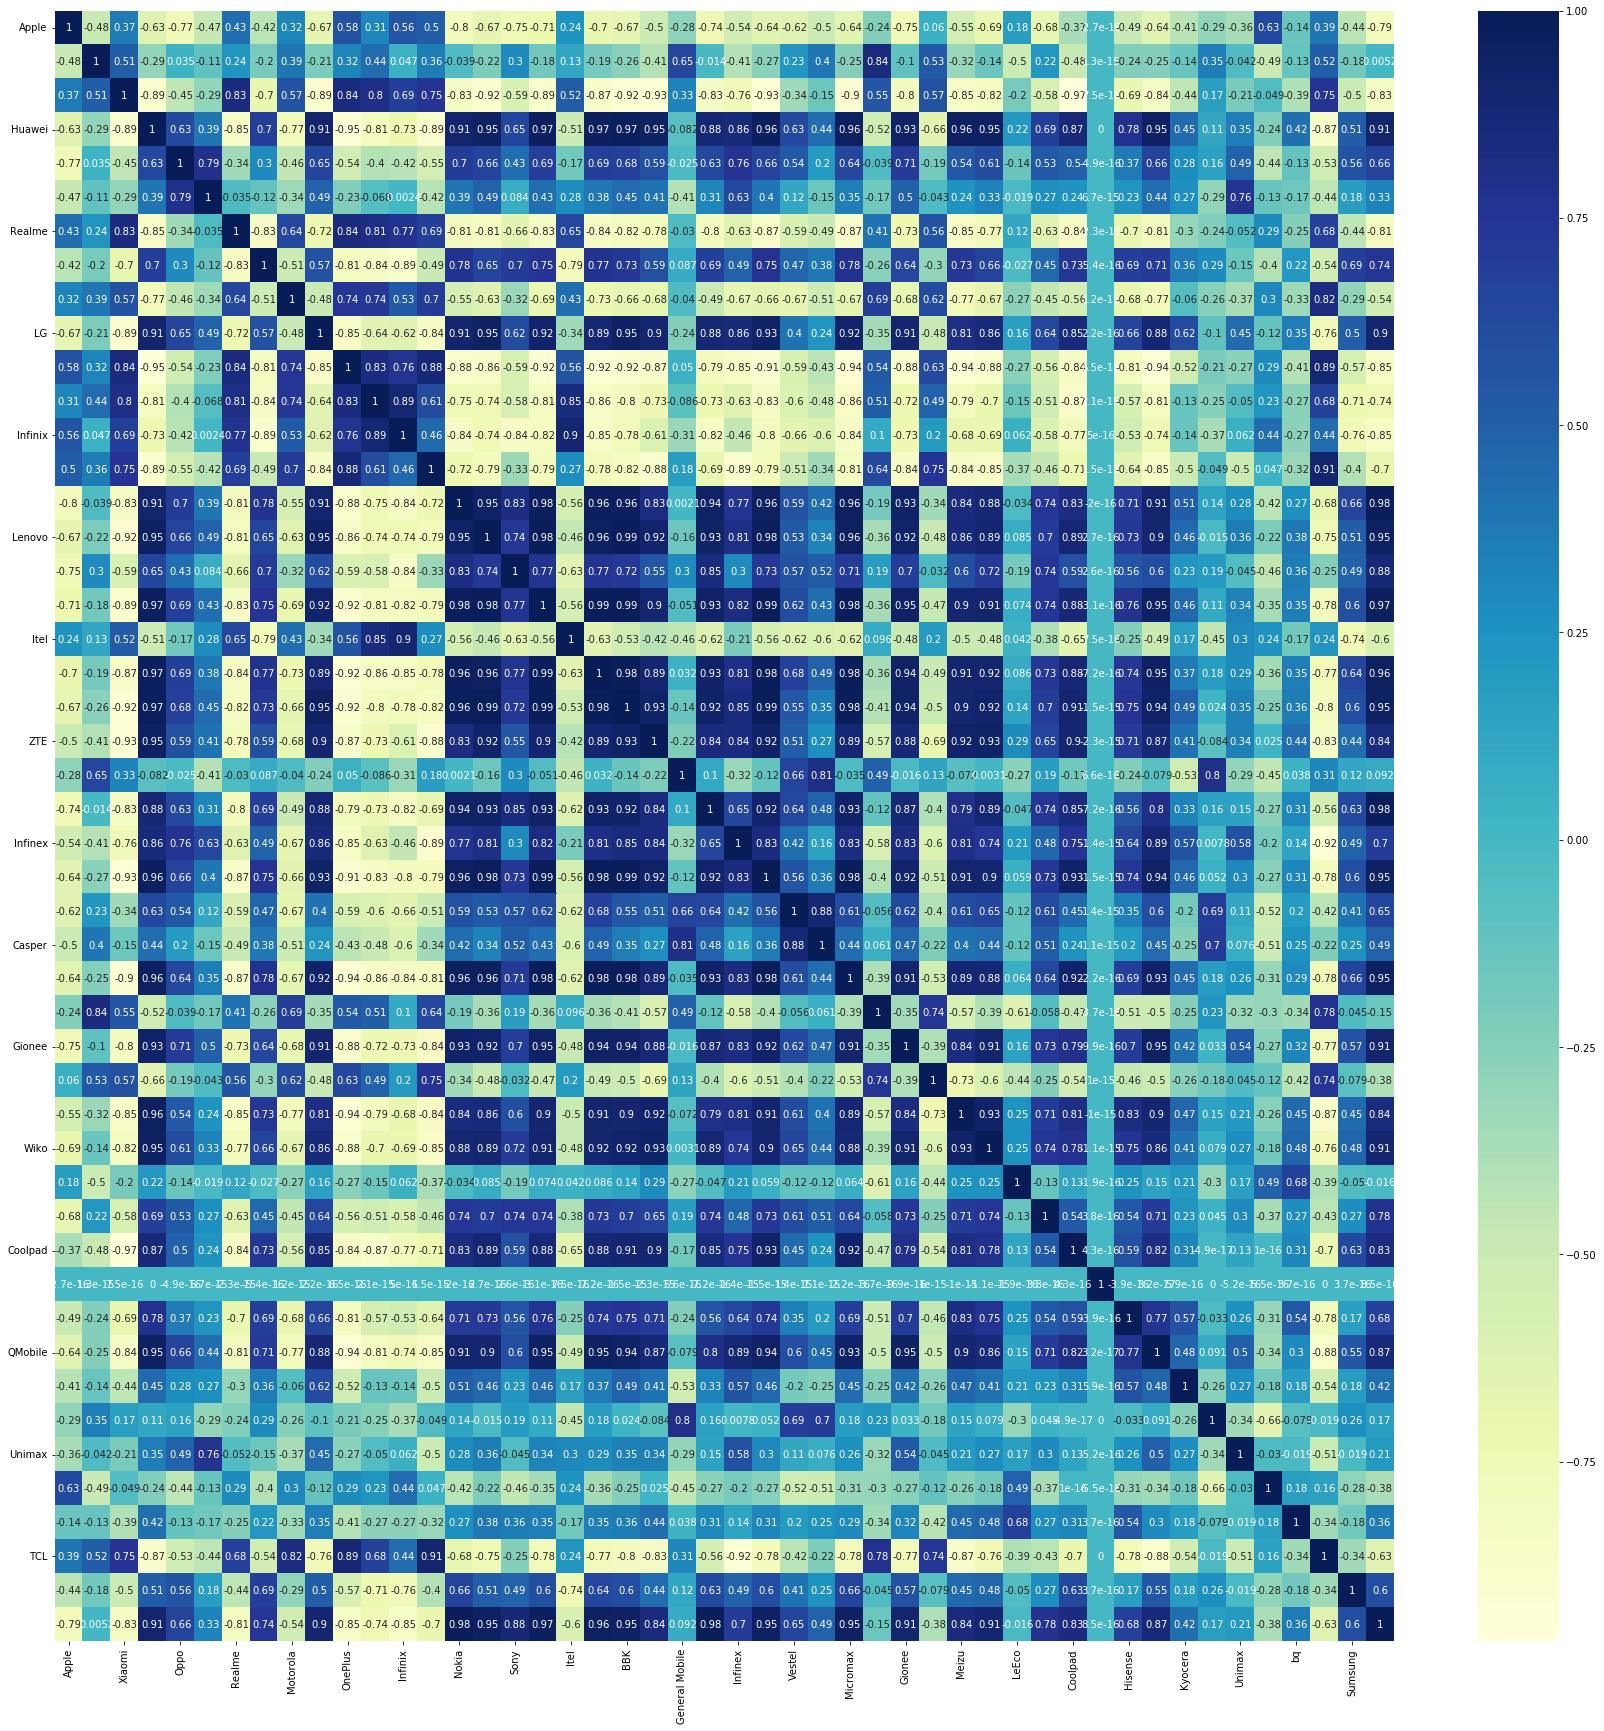

In [13]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(30, 30)
plt.savefig("static/Img/worldwideheatmap.png")
plt.show()

# Part 2: MongoDB


In [14]:
import pymongo

In [15]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [16]:
# Declare the database for Africa
db = client.phonebrand

In [17]:
#Insert the scraped_data in the database
africa_dict = africa_df.to_dict("records")

In [18]:
#Insert data
db.africa.insert_many(africa_dict)

In [19]:
#Insert the scraped_data in the database
asia_dict = asia_df.to_dict("records")

In [20]:
#Insert data
db.asia.insert_many(asia_dict)

In [21]:
#Insert the scraped_data in the database
worldwide_dict = worldwide_df.to_dict("records")

In [22]:
#Insert data
db.worldwide.insert_many(worldwide_dict)